In [85]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import decomposition

data = pd.read_csv('./data/mushroom/expanded')
X = pd.get_dummies(data)
pca = decomposition.PCA(n_components=3)
pca.fit(X) 
X = pca.transform(X) #applies dimension reduction


In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 0
best_sil_score = 0
sil_scores = [] # list of silhouette scores

# Higher SC means better clusters
for k in range(2,30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    sil_score = silhouette_score(X, y_kmeans)
    sil_scores.append(sil_score)

    print("K = {} score: {}".format(k, sil_score))

    if (sil_score > best_sil_score):
        best_sil_score = sil_score
        best_k = k


K = 2 score: 0.4724712458767897
K = 3 score: 0.6125196729648534
K = 4 score: 0.656660290437222
K = 5 score: 0.6749053437575152
K = 6 score: 0.656290896380174
K = 7 score: 0.6633278976027057
K = 8 score: 0.5752740246671947
K = 9 score: 0.5775213586489361
K = 10 score: 0.5514751734653092
K = 11 score: 0.4811541336893468
K = 12 score: 0.48646112916226836
K = 13 score: 0.41160821150808874
K = 14 score: 0.3926747197365078
K = 15 score: 0.39976679553620237
K = 16 score: 0.41677761162256116
K = 17 score: 0.410314404891124
K = 18 score: 0.3702954176365957
K = 19 score: 0.3809517790286822
K = 20 score: 0.3794900786197714
K = 21 score: 0.3676945777627007
K = 22 score: 0.37203133147153866
K = 23 score: 0.3642398961671055
K = 24 score: 0.36965180477729465
K = 25 score: 0.37981061477029054
K = 26 score: 0.3593325825432459
K = 27 score: 0.36208770597124573
K = 28 score: 0.35441142800328096
K = 29 score: 0.37160286437758167


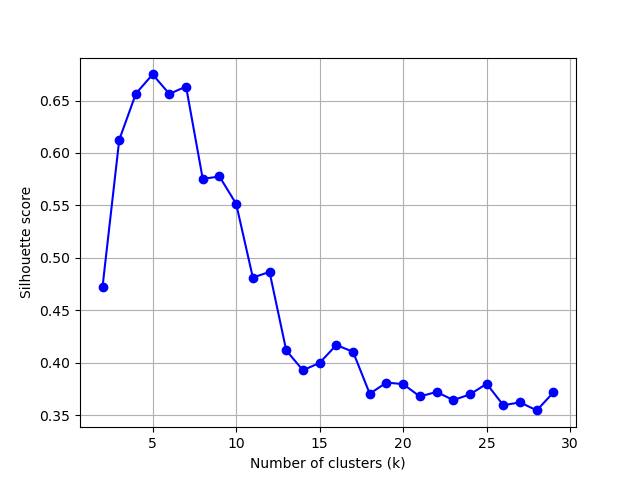

In [87]:
plt.figure()


plt.plot(range(2, 30), sil_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()

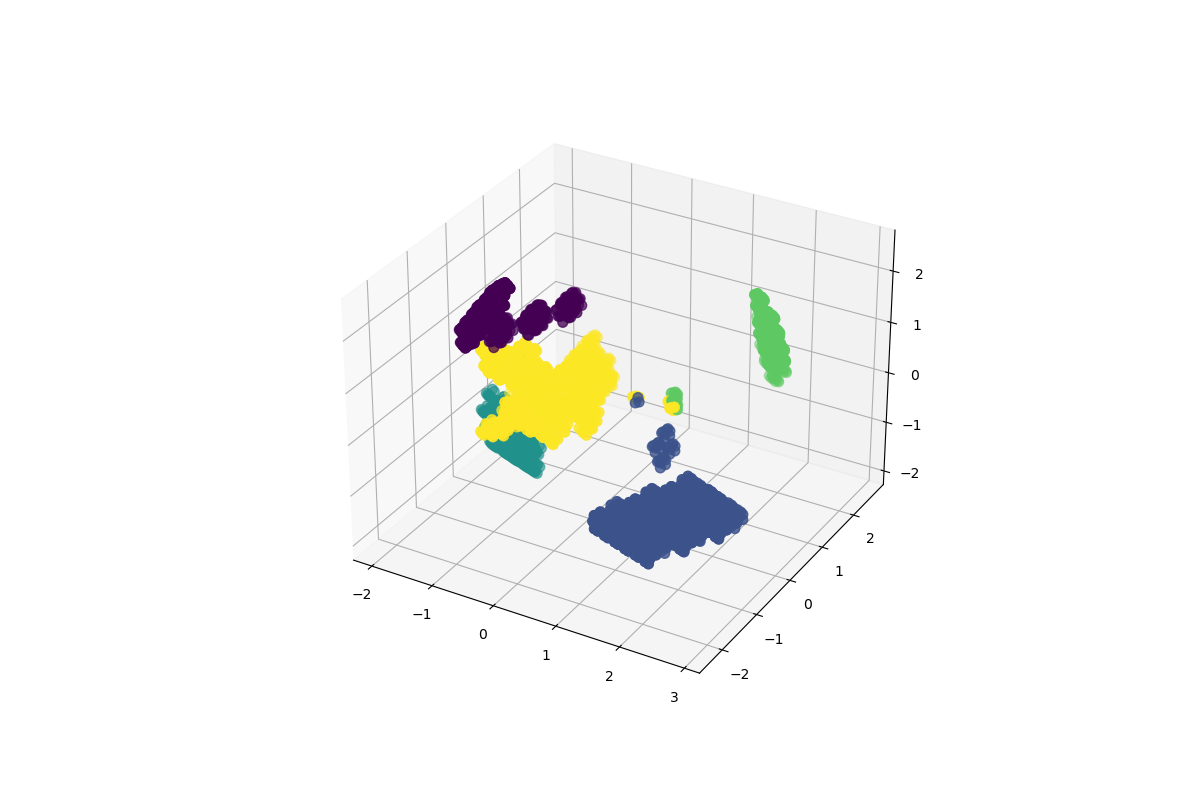

In [88]:
# Visualizing using best k

kmeans = KMeans(n_clusters=best_k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50, c=y_kmeans, cmap='viridis')
plt.show()
